In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as mpl
import time
%matplotlib inline
%pylab inline

pd.set_option('display.mpl_style', 'default')
# plt.style.use('ggplot')
figsize(5, 4)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [4]:
tm = time.time()
trainX = pd.read_csv('D:\\Competitions\\Facebook\\train.csv')
print ('time = ', time.time() - tm)

time =  25.51345920562744


In [5]:
trainX.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [7]:
trainX.describe()

,row_id,x,y,accuracy,time,place_id
count,29118021.000000,29118021.000000,29118021.000000,29118021.000000,29118021.000000,2.911802e+07
mean,14559010.000000,4.999770,5.001814,82.849125,417010.364723,5.493787e+09
std,8405648.775647,2.857601,2.887505,114.751772,231176.146498,2.611088e+09
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000016e+09
25%,7279505.000000,2.534700,2.496700,27.000000,203057.000000,3.222911e+09
50%,14559010.000000,5.009100,4.988300,62.000000,433922.000000,5.518573e+09
75%,21838515.000000,7.461400,7.510300,75.000000,620491.000000,7.764307e+09
max,29118020.000000,10.000000,10.000000,1033.000000,786239.000000,9.999932e+09


In [8]:
trainX.place_id.nunique()

108390

In [10]:
trainX.shape

(29118021, 6)

In [110]:
trainX.shape[0] / trainX.place_id.nunique()

268.6412122889565

In [111]:
tm = time.time()
testX = pd.read_csv('D:\\Competitions\\Facebook\\test.csv')
print ('time = ', time.time() - tm)

time =  5.3203043937683105


# Схожесть распределений "обучение - тест"

In [112]:
import seaborn as sns 

In [115]:
def showdensities(feature="accuracy", bins=50):
    counts1, bins1 = np.histogram(trainX[feature], bins=bins)
    binsc1 = bins1[:-1] + np.diff(bins1)/2.
    
    counts2, bins2 = np.histogram(testX[feature], bins=bins)
    binsc2 = bins2[:-1] + np.diff(bins2)/2.
    
    plt.figure(0, figsize=(14,4))
    
    plt.subplot(121)
    plt.bar(binsc1, counts1/(counts1.sum()*1.0), width=np.diff(bins1)[0])
    plt.grid(True)
    plt.xlabel("Accuracy")
    plt.ylabel("Fraction")
    plt.title("Train")
    
    plt.subplot(122)
    plt.bar(binsc2, counts2/(counts2.sum()*1.0), width=np.diff(bins2)[0])
    plt.grid(True)
    plt.xlabel("Accuracy")
    plt.ylabel("Fraction")
    plt.title("Test")
    
    plt.show()

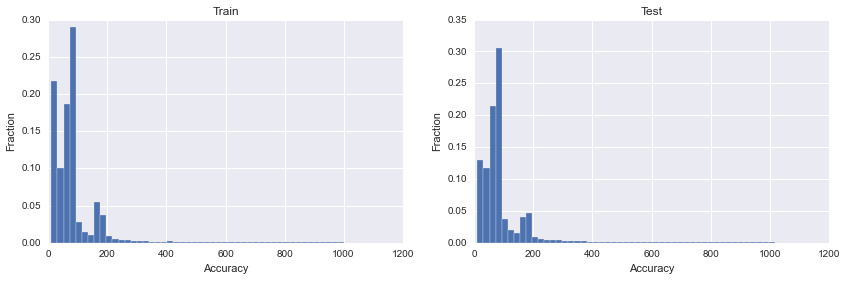

In [116]:
showdensities()

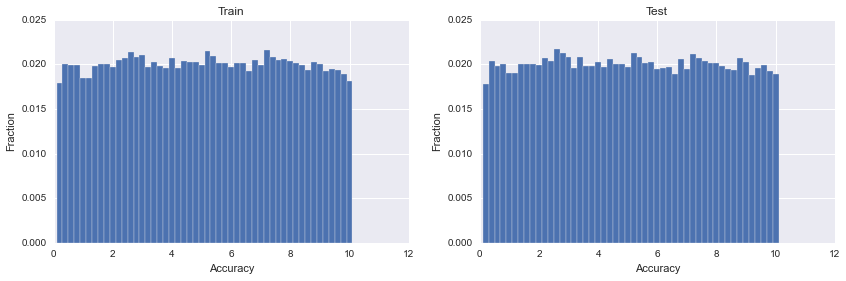

In [117]:
showdensities('x')

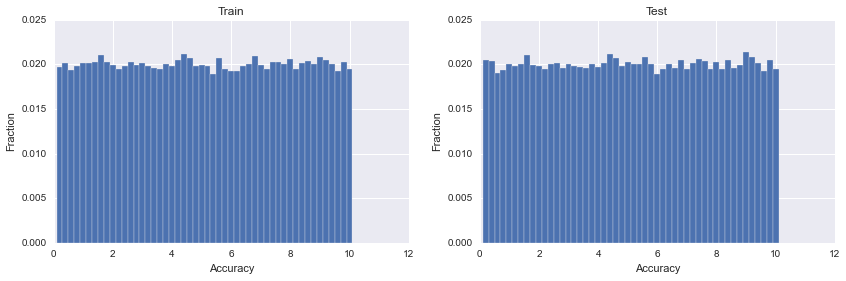

In [118]:
showdensities('y')

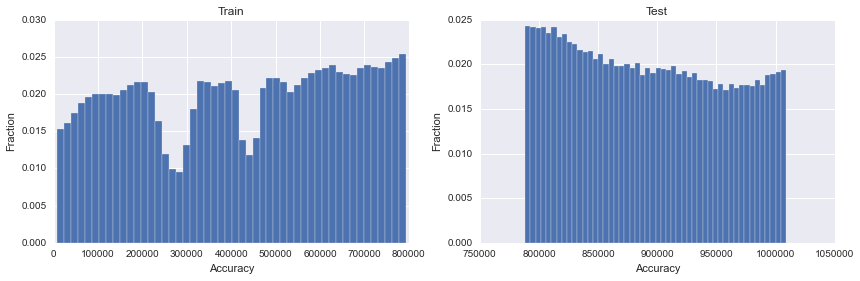

In [119]:
showdensities('time')

## насколько часто встречаются места

In [124]:
placecounts = trainX["place_id"].value_counts()
placecounts[:5]

8772469670    1849
1623394281    1802
1308450003    1757
4823777529    1738
9586338177    1718
Name: place_id, dtype: int64

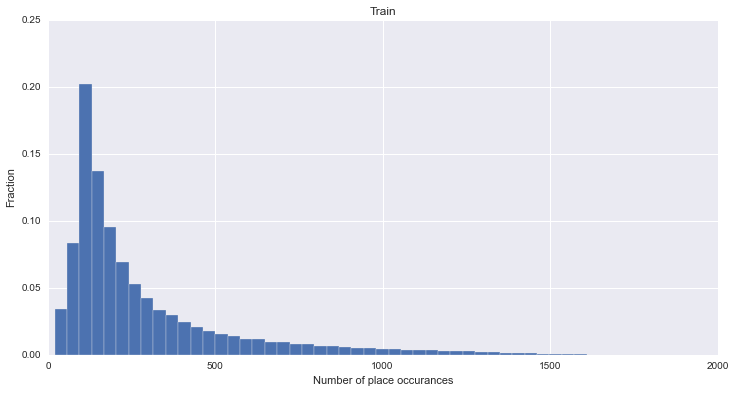

In [125]:
counts, bins = np.histogram(placecounts.values, bins=50)
binsc = bins[:-1] + np.diff(bins)/2.

plt.figure(3, figsize=(12,6))
plt.bar(binsc, counts/(counts.sum()*1.0), width=np.diff(bins)[0])
plt.grid(True)
plt.xlabel("Number of place occurances")
plt.ylabel("Fraction")
plt.title("Train")
plt.show()

## встречаемость по времени

In [130]:
place = placecounts.index[0]


In [154]:
def showplacefreq(place, figid):
    t = trainX[trainX.place_id==place].time
    counts1, bins1 = np.histogram(t, bins=545, range=(1, 786239))
    binsc1 = bins1[:-1] + np.diff(bins1)/2.
    plt.figure(figid, figsize=(16,3))
    plt.bar(binsc1, counts1/(counts1.sum()*1.0), width=np.diff(bins1)[0])
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("freq")
    plt.title("placeid="+str(place))

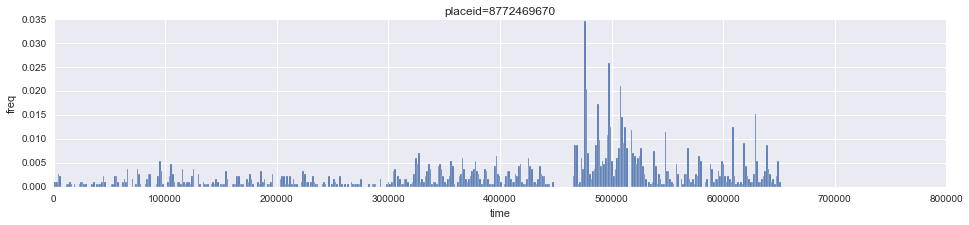

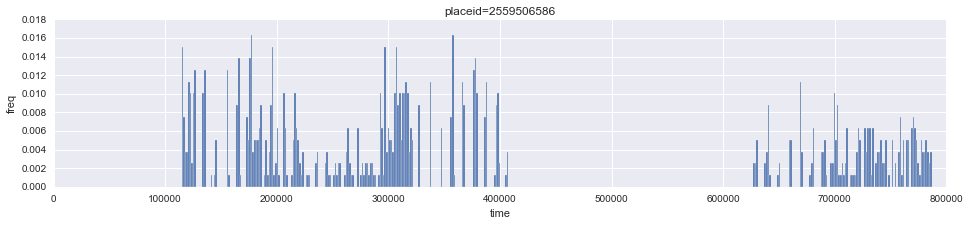

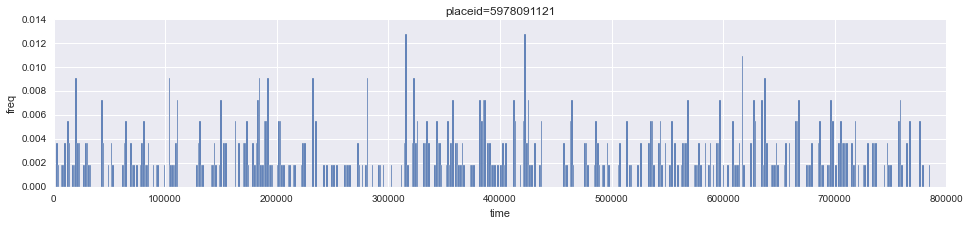

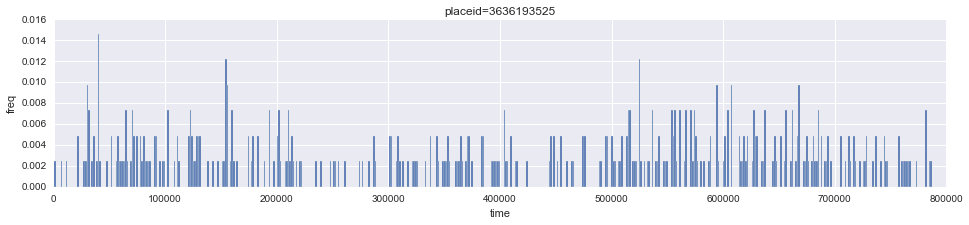

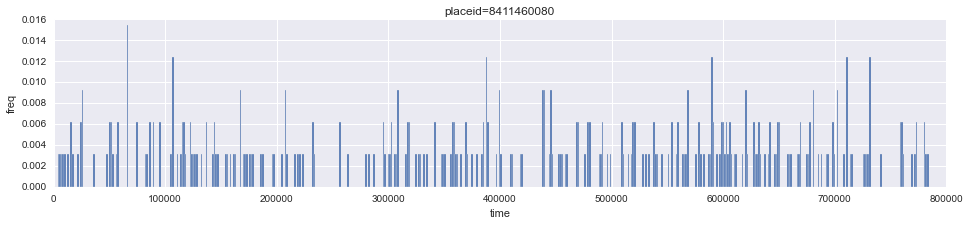

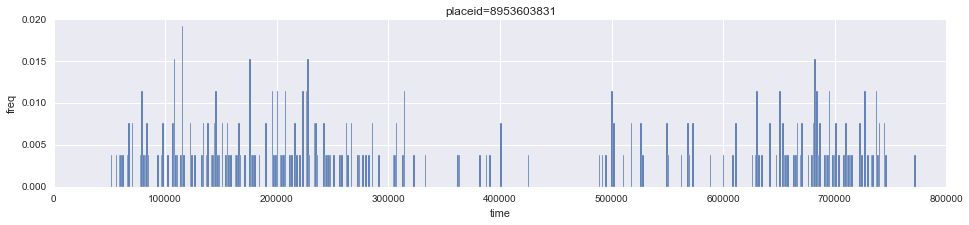

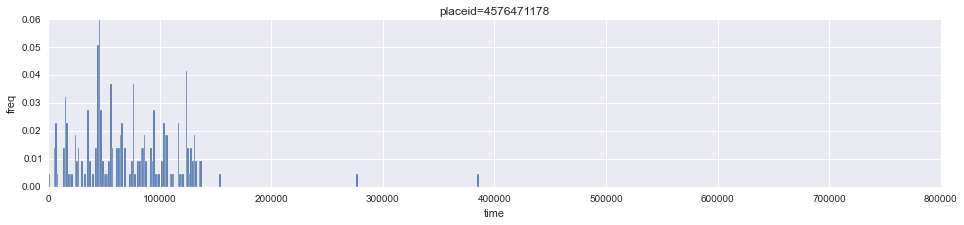

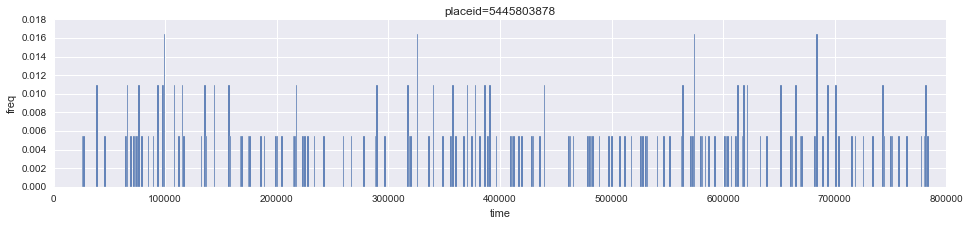

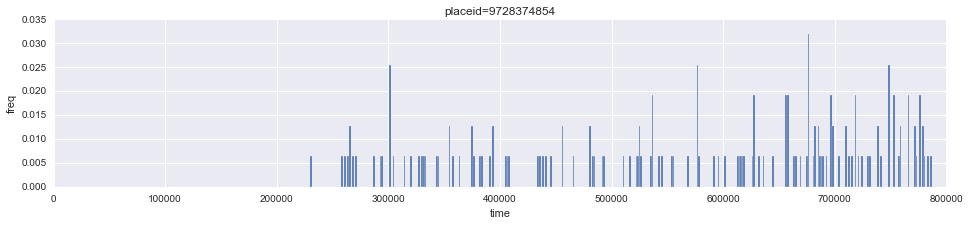

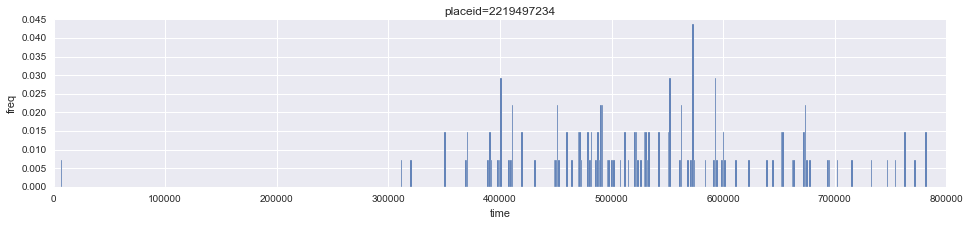

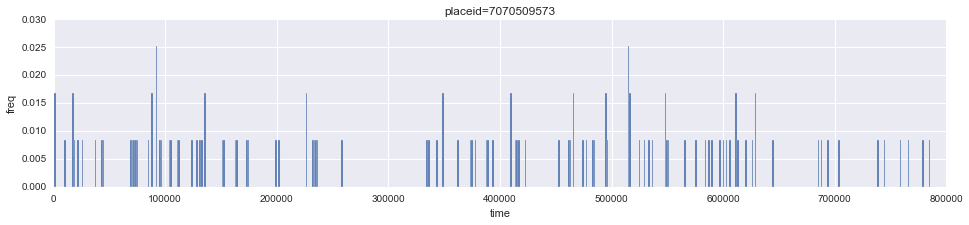

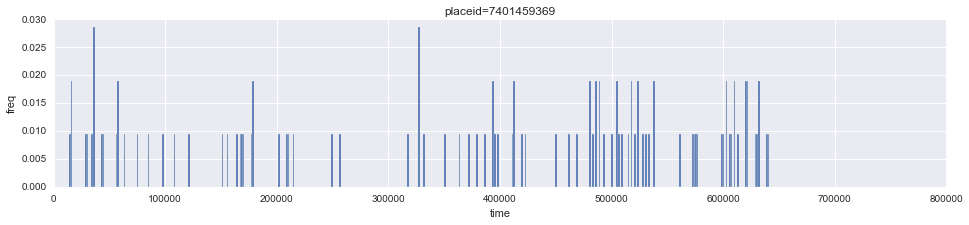

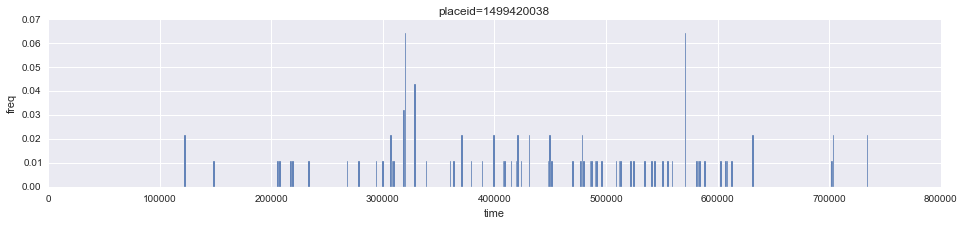

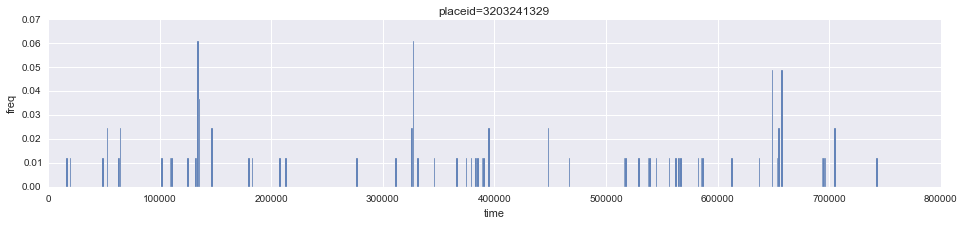

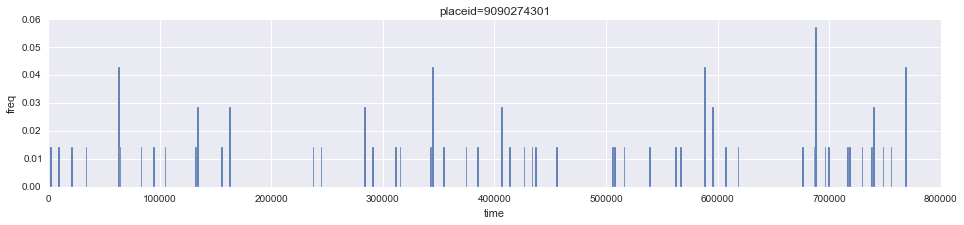

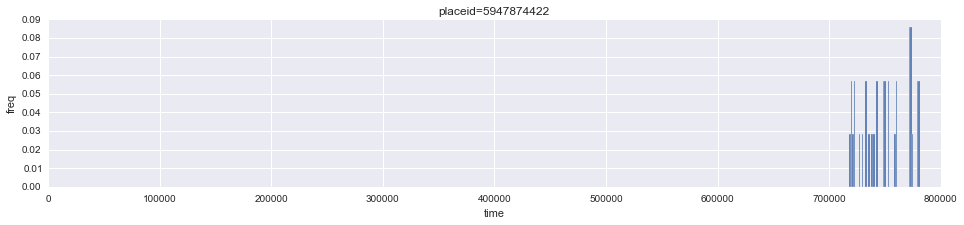

In [156]:
for j, i in enumerate(range(0,108000,7000)):
    #print(i)
    showplacefreq(placecounts.index[i], j)

что-то бывает периодами, но как это угадать?!

## Дни недели

In [178]:
trainX["dayofweek"] = np.floor((trainX.time-1)/(60*24)) % 7

In [186]:
def showplacefreq_dow(place, figid):
    t = trainX[trainX.place_id==place].dayofweek
    counts1, bins1 = np.histogram(t, bins=7)
    binsc1 = bins1[:-1] + np.diff(bins1)/2.
    plt.figure(figid, figsize=(16,3))
    plt.bar(binsc1, counts1/(counts1.sum()*1.0), width=np.diff(bins1)[0])
    plt.grid(True)
    plt.xlabel("dayofweek")
    plt.ylabel("freq")
    plt.title("placeid="+str(place))

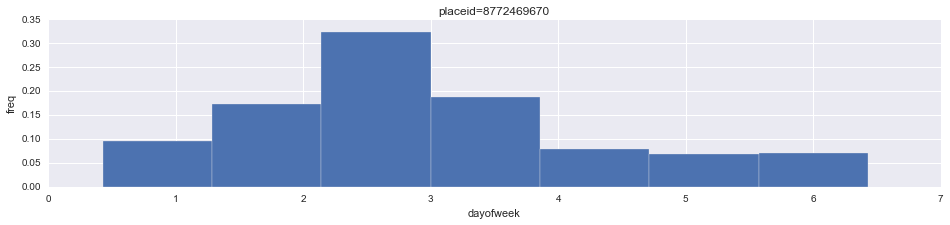

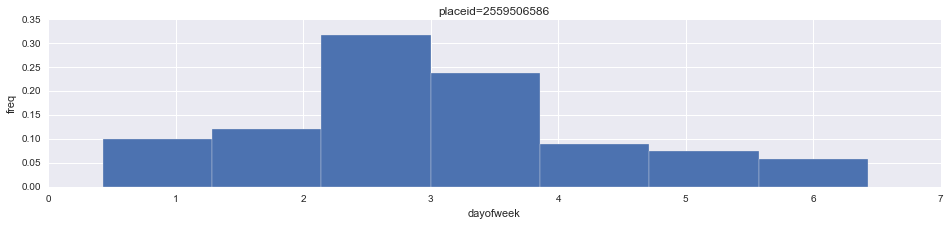

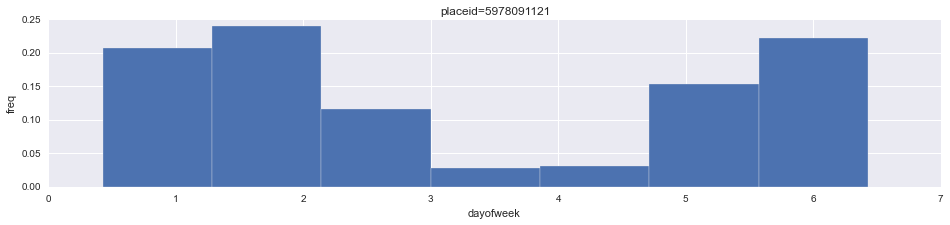

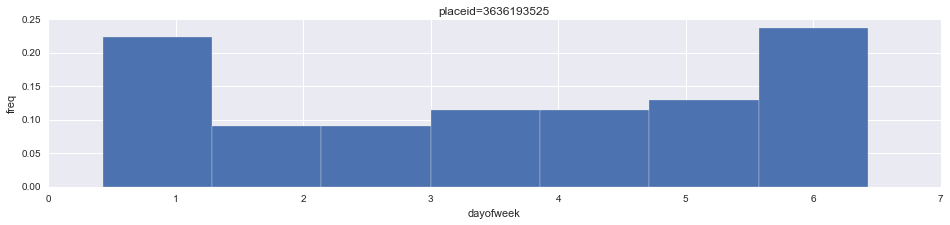

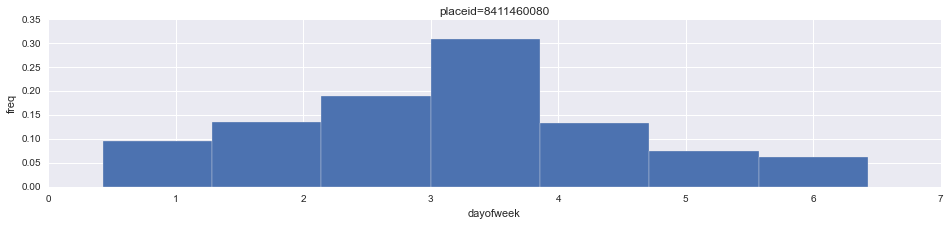

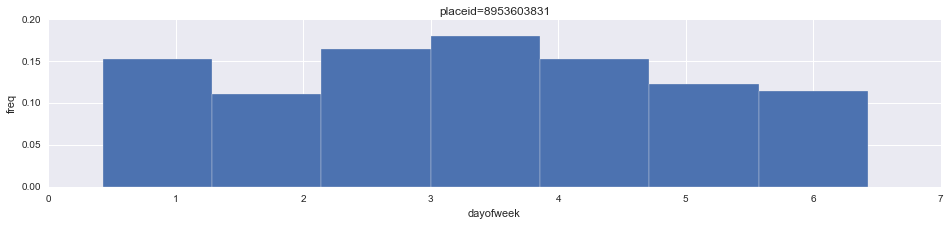

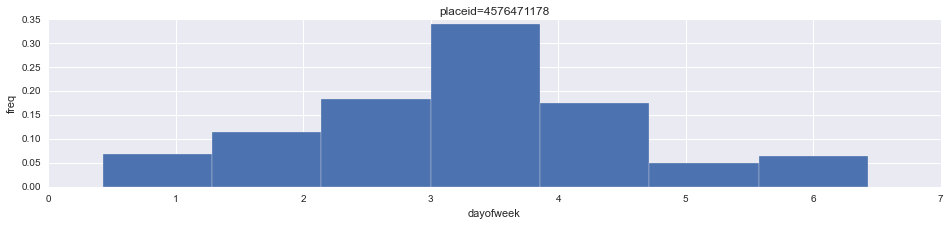

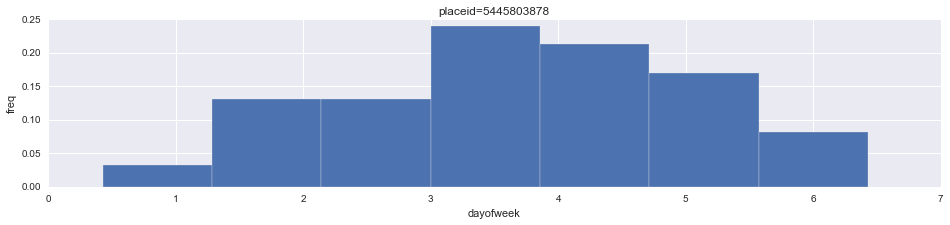

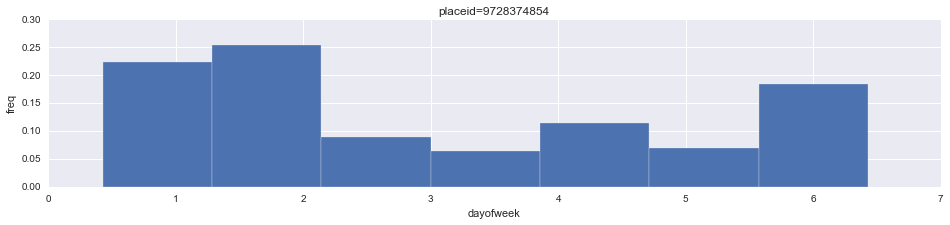

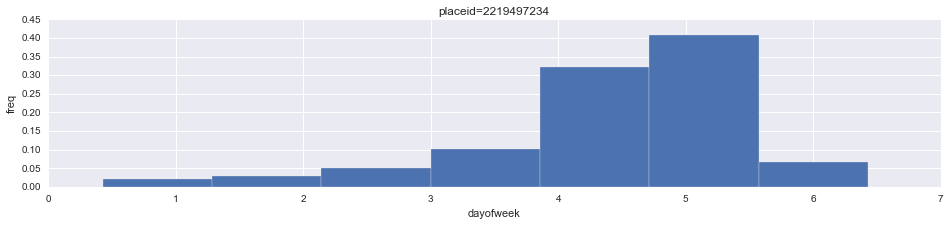

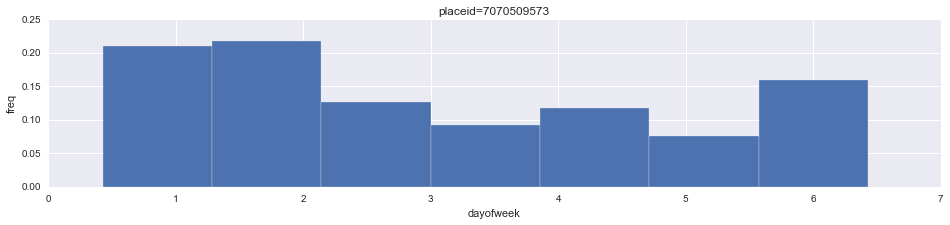

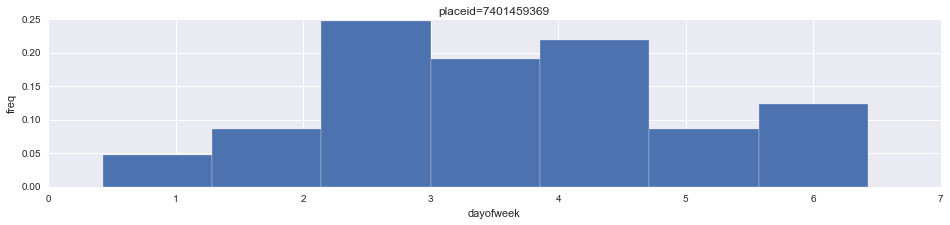

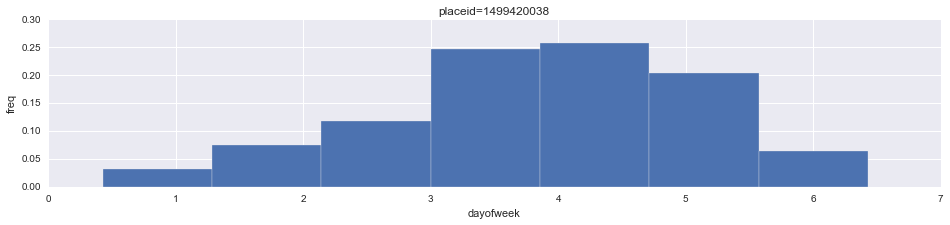

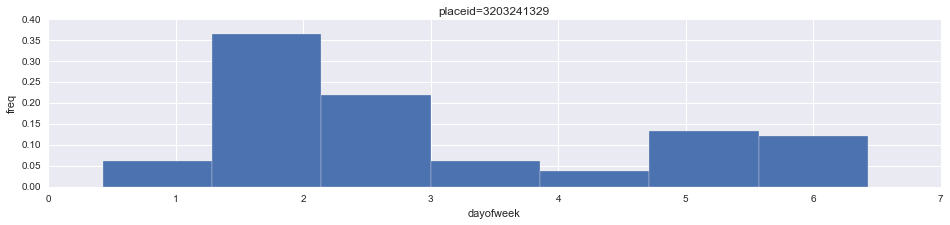

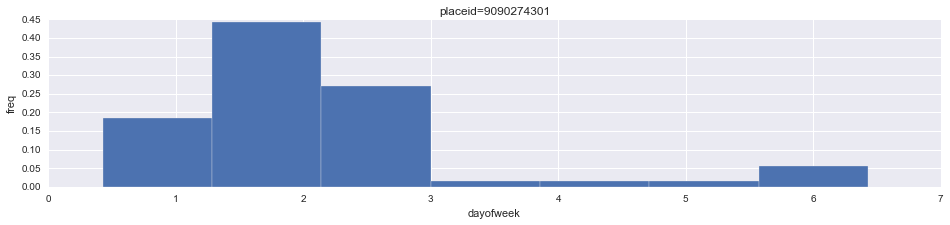

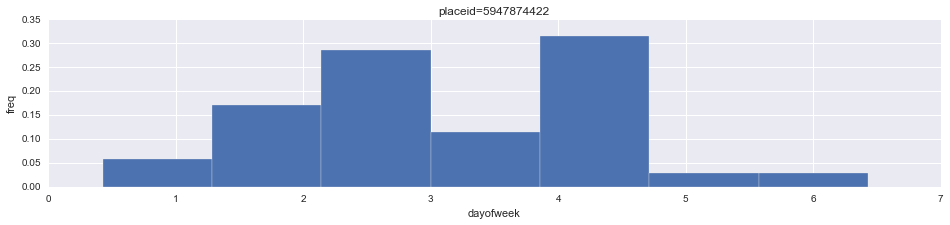

In [187]:
for j, i in enumerate(range(0,108000,7000)):
    #print(i)
    showplacefreq_dow(placecounts.index[i], j)

Вроде, день недели играет роль!!!

In [181]:
## Час

In [182]:
trainX["hour"] = np.floor((trainX.time-1)/60) % 24

In [188]:
def showplacefreq_h(place, figid):
    t = trainX[trainX.place_id==place].hour
    counts1, bins1 = np.histogram(t, bins=24)
    binsc1 = bins1[:-1] + np.diff(bins1)/2.
    plt.figure(figid, figsize=(16,3))
    plt.bar(binsc1, counts1/(counts1.sum()*1.0), width=np.diff(bins1)[0])
    plt.grid(True)
    plt.xlabel("hour")
    plt.ylabel("freq")
    plt.title("placeid="+str(place))

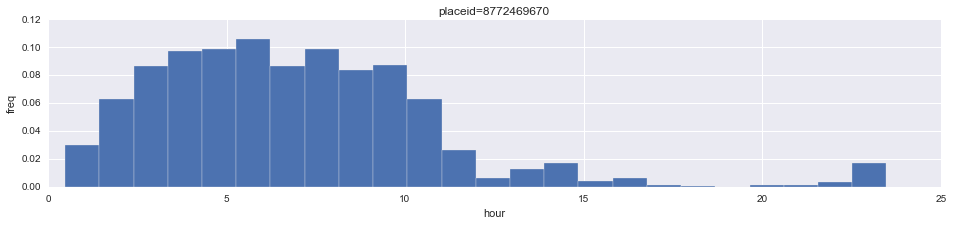

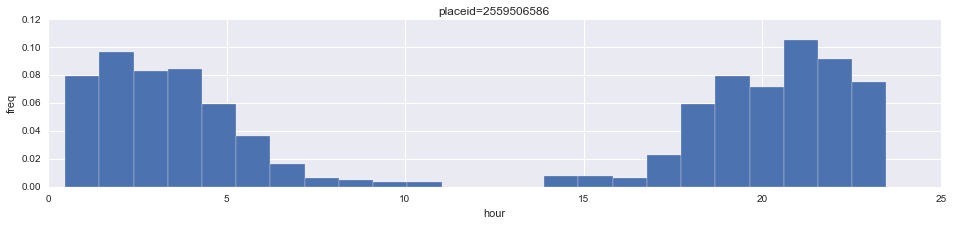

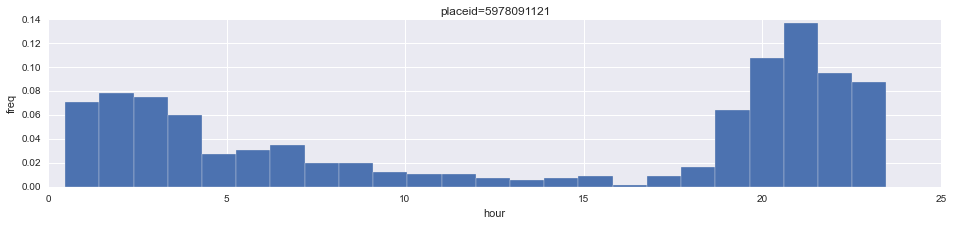

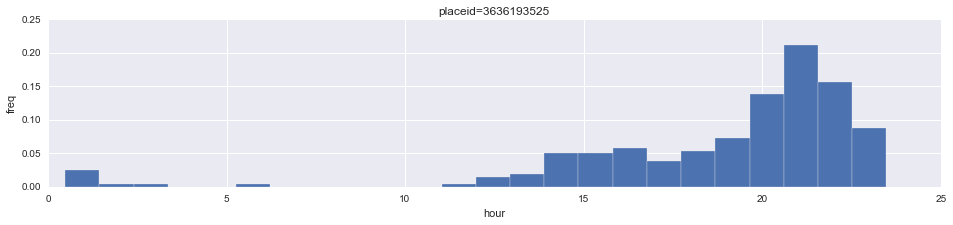

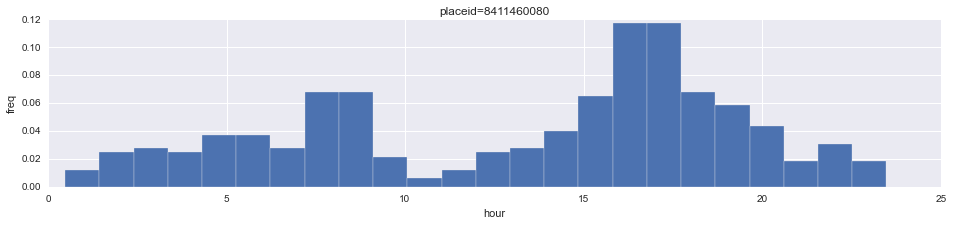

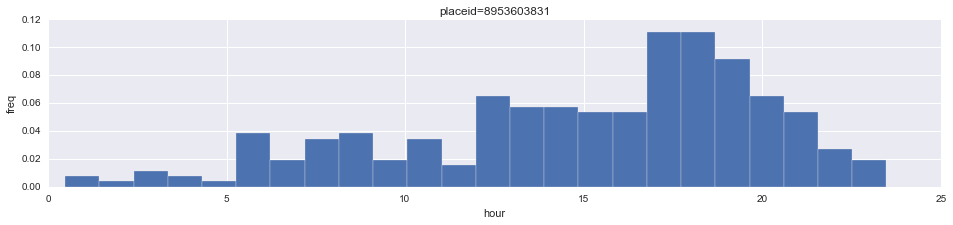

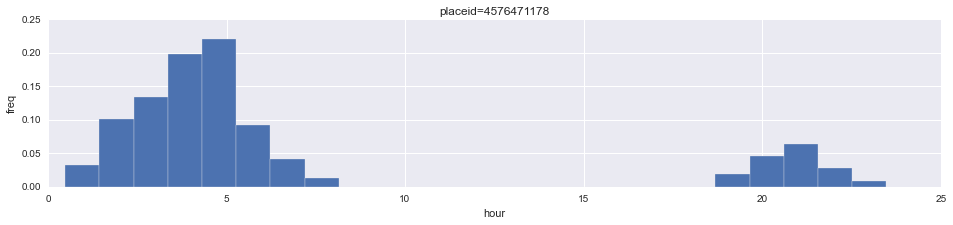

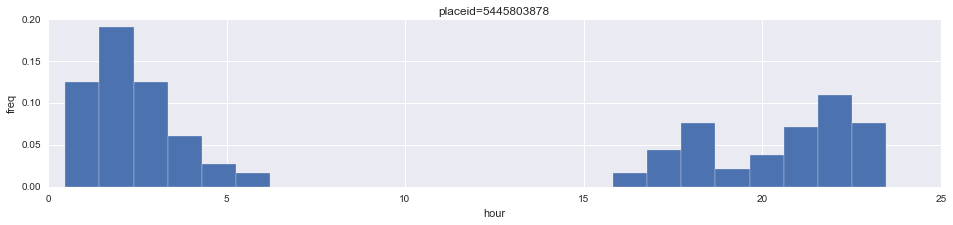

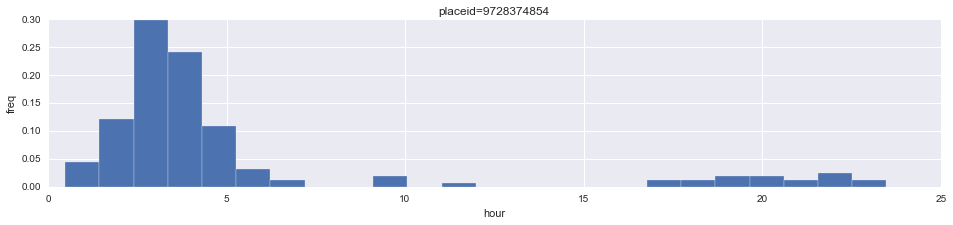

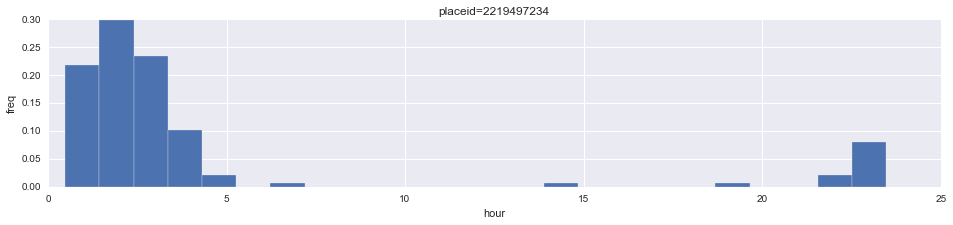

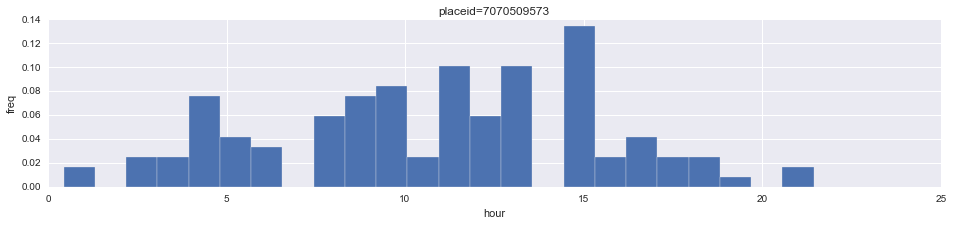

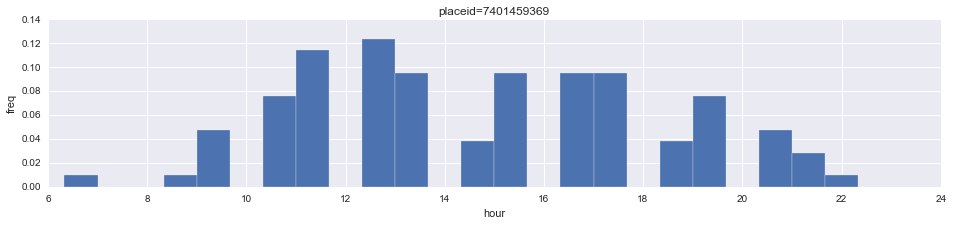

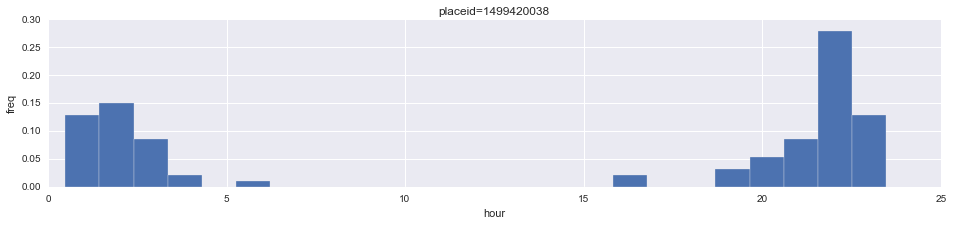

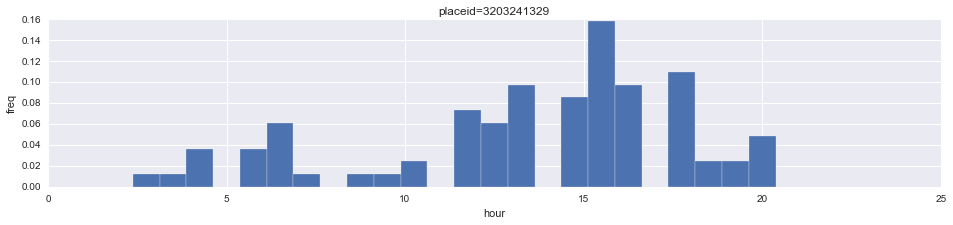

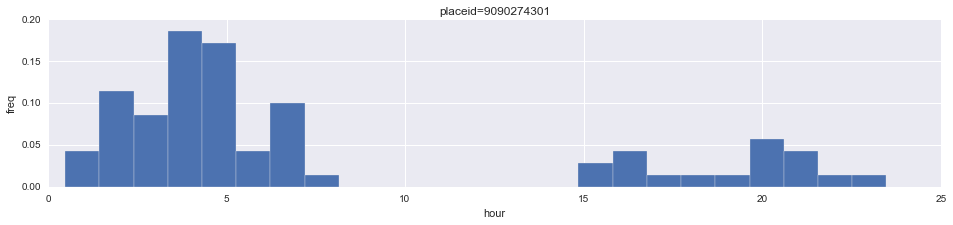

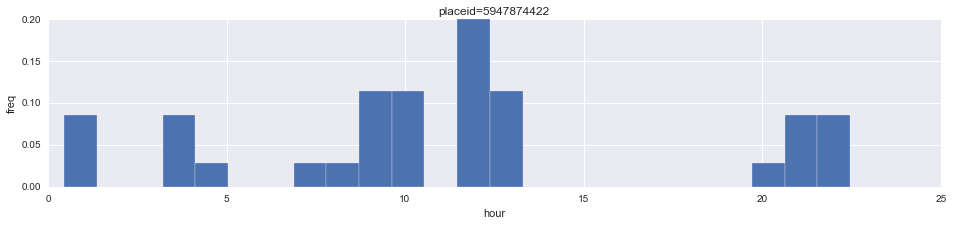

In [189]:
for j, i in enumerate(range(0,108000,7000)):
    #print(i)
    showplacefreq_h(placecounts.index[i], j)

Вроде, и час - полезная штука!

In [190]:
trainX["minute"] = np.floor((trainX.time-1)) % 60

In [191]:
def showplacefreq_m(place, figid):
    t = trainX[trainX.place_id==place].minute
    counts1, bins1 = np.histogram(t, bins=60)
    binsc1 = bins1[:-1] + np.diff(bins1)/2.
    plt.figure(figid, figsize=(16,3))
    plt.bar(binsc1, counts1/(counts1.sum()*1.0), width=np.diff(bins1)[0])
    plt.grid(True)
    plt.xlabel("minute")
    plt.ylabel("freq")
    plt.title("placeid="+str(place))

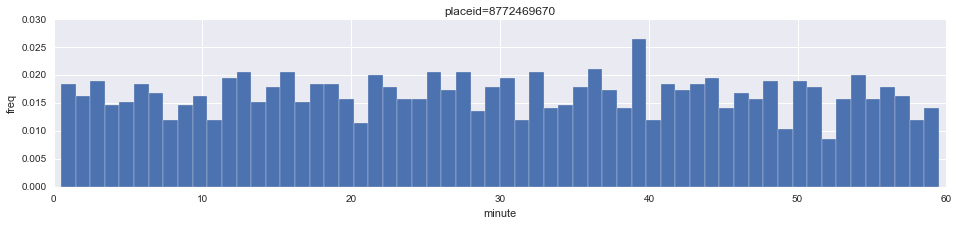

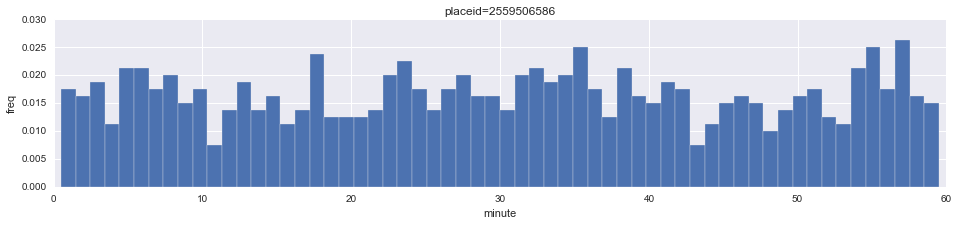

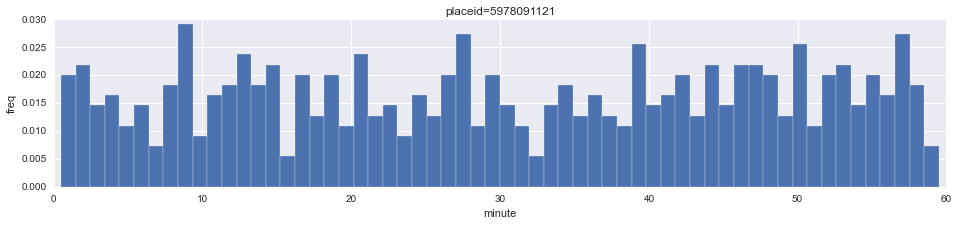

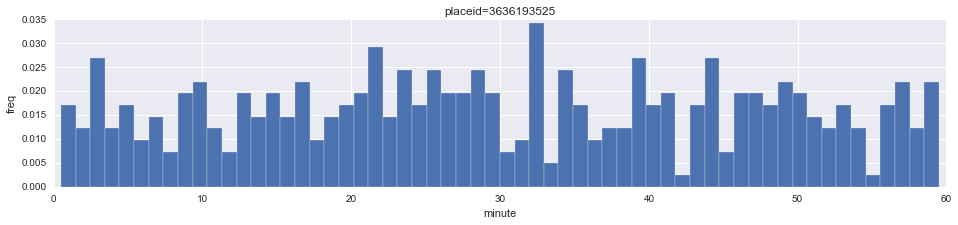

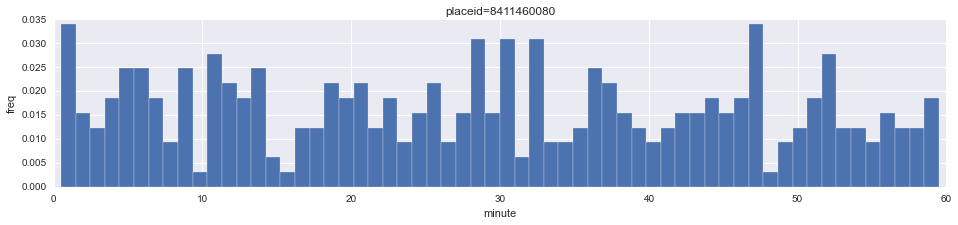

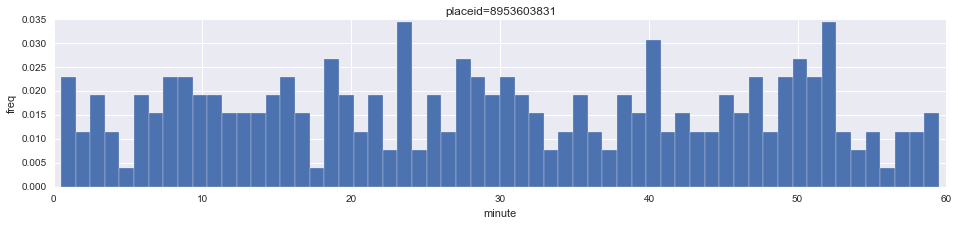

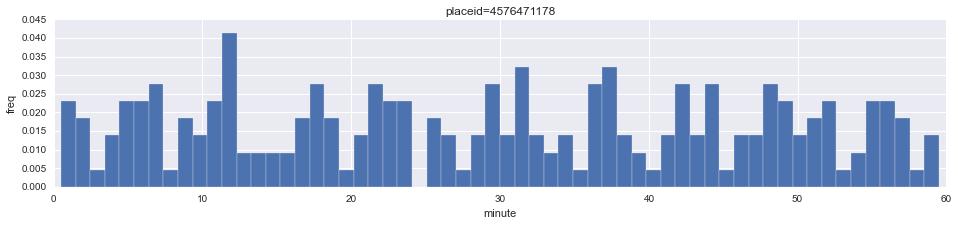

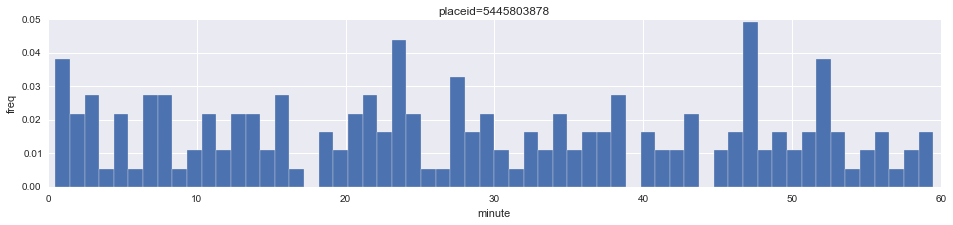

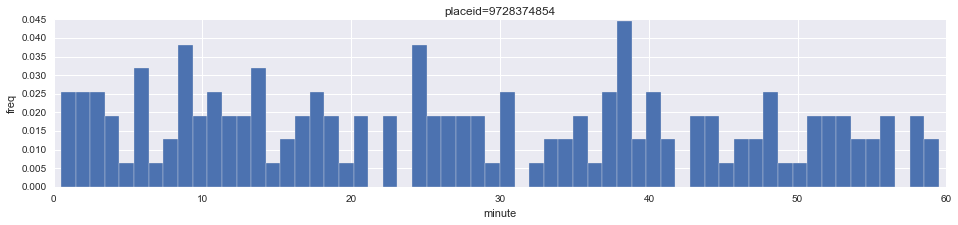

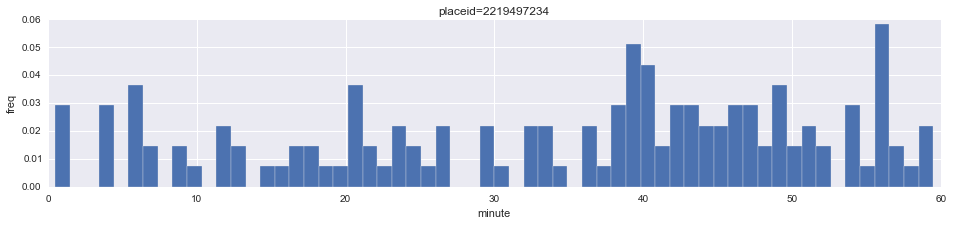

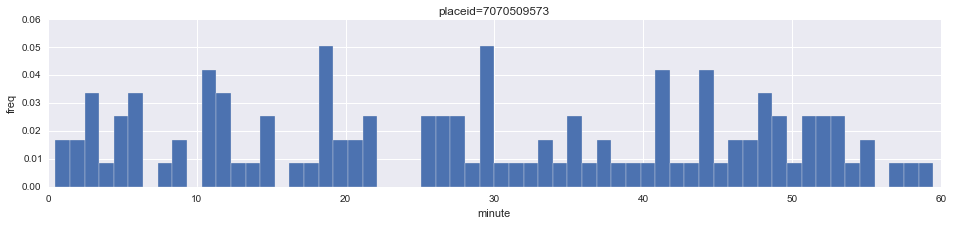

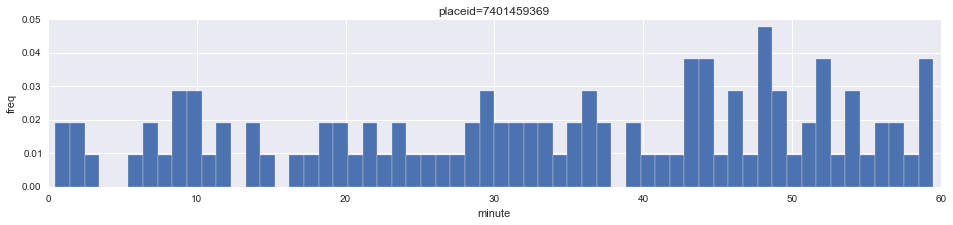

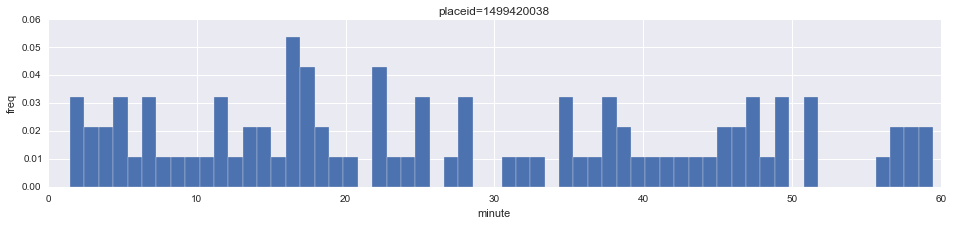

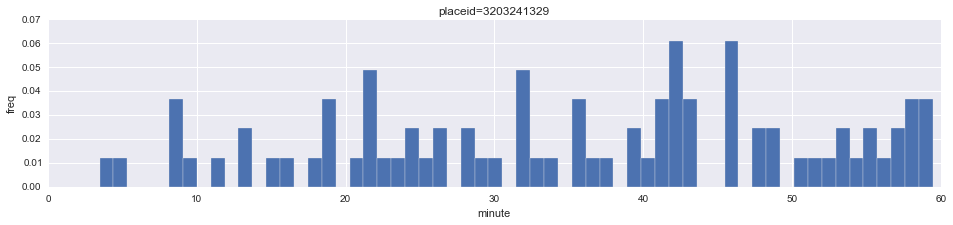

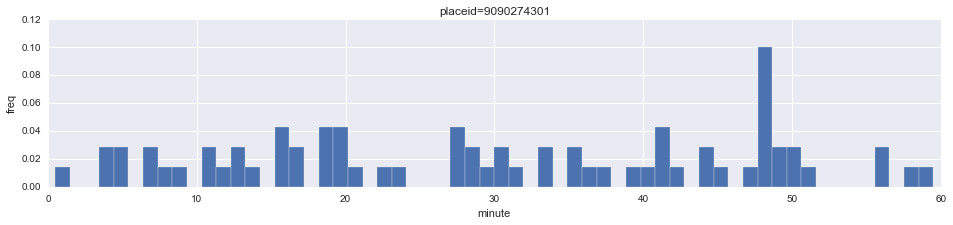

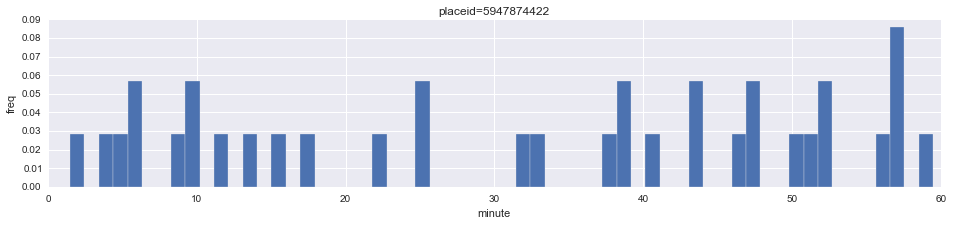

In [192]:
for j, i in enumerate(range(0,108000,7000)):
    #print(i)
    showplacefreq_m(placecounts.index[i], j)

А вот тут, вроде, ерунда

## общее распределение по осям

In [193]:
from scipy.stats import gaussian_kde

kde_train_x = gaussian_kde(trainX.x.values)
kde_train_y = gaussian_kde(trainX.y.values)

kde_test_x = gaussian_kde(testX.x.values)
kde_test_y = gaussian_kde(testX.y.values)

In [199]:
# ОЧЕНЬ ДОЛГО!!!
lin = np.linspace(0.0, 10.0, 100)
d_train_x = kde_train_x(lin)
d_train_y = kde_train_y(lin)
d_test_x = kde_test_x(lin)
d_test_y = kde_test_y(lin)

In [200]:
current_palette = sns.color_palette() # seaborn

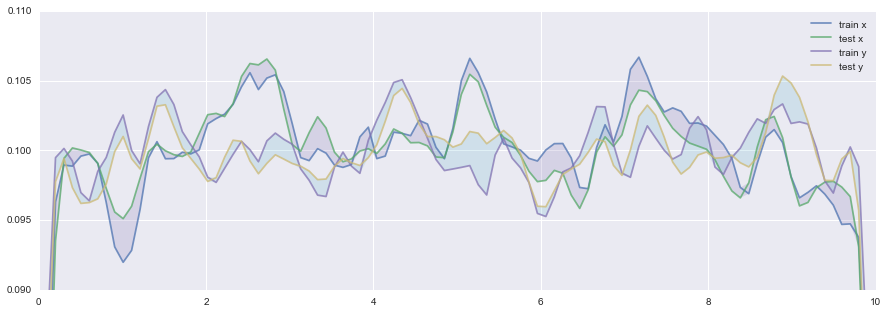

In [208]:
figsize(15,5)
plt.plot(lin, d_train_x, c=current_palette[0], ls="-", alpha=0.75, label="train x")
plt.plot(lin, d_test_x, c=current_palette[1], ls="-", alpha=0.75, label="test x")
plt.gca().fill_between(lin, np.minimum(d_train_x, d_test_x), np.maximum(d_train_x, d_test_x), facecolor=current_palette[3], alpha=0.2)
plt.plot(lin, d_train_y, c=current_palette[3], ls="-", alpha=0.75, label="train y")
plt.plot(lin, d_test_y, c=current_palette[4], ls="-", alpha=0.75, label="test y")
plt.gca().fill_between(lin, np.minimum(d_train_y, d_test_y), np.maximum(d_train_y, d_test_y), facecolor=current_palette[5], alpha=0.2)
plt.legend()
plt.ylim(0.09, 0.11)
plt.grid(True)


### совместное распределение

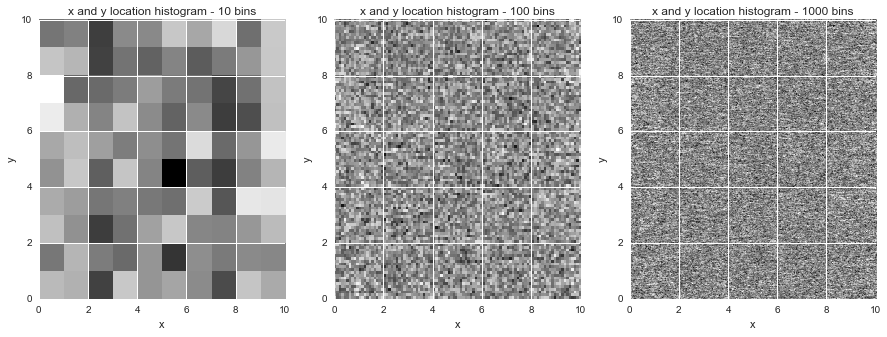

In [214]:
from matplotlib.colors import LogNorm

bins = [10, 100, 1000]
plt.figure(0, figsize=(15,5))
for i, b in enumerate(bins):
    plt.subplot(131 + i)
    plt.hist2d(trainX.x.values, trainX.y.values, bins=b, norm=LogNorm()) #, norm=LogNorm()
    #plt.colorbar()
    plt.title('x and y location histogram - ' + str(b) + ' bins')
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()
    


0.0

In [160]:
trainX.time.max()/60/24

545.99930555555557

In [ ]:
i = trainX.time.argsort()

In [16]:
trainX = trainX.ix[i, :]

In [17]:
trainX.head()

,row_id,x,y,accuracy,time,place_id
15280869,15280869,2.9374,1.0010,433,1,7186804346
23020268,23020268,5.3673,5.6998,25,1,7449653826
3977976,3977976,3.1148,3.6161,8,1,8090429732
27743788,27743788,3.7725,6.4504,65,2,4115006237
3836334,3836334,3.5102,3.6296,8,3,8090429732


In [18]:
train = trainX[trainX.time<600000]
test = trainX[trainX.time>=600000]
print (train.shape, test.shape)

(20938813, 6) (8179208, 6)


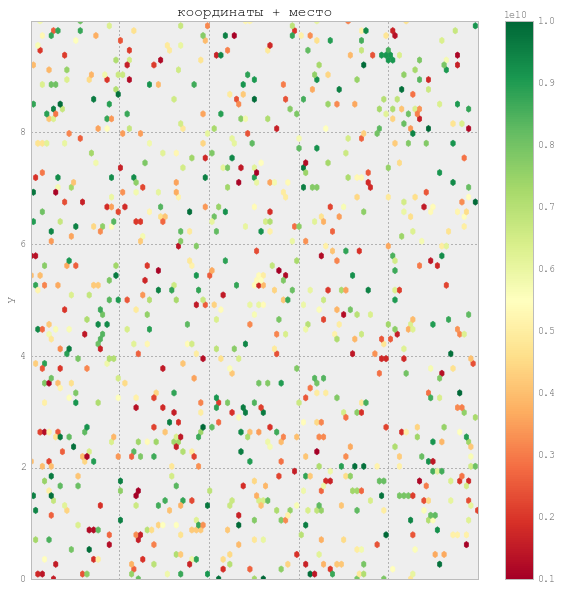

In [20]:
figsize(10, 10)
ax = test[:1000].plot(kind='hexbin', x='x', y='y', C='place_id', colormap='RdYlGn')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("координаты + место")

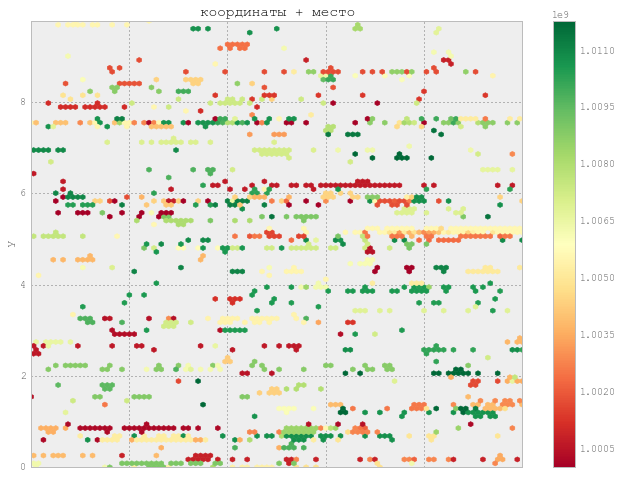

In [24]:
figsize(11, 8)
# вот твк надо сортировать!
ax = test.sort_values(by="place_id")[:10000].plot(kind='hexbin', x='x', y='y', C='place_id', colormap='RdYlGn')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("координаты + место")

place характерно для какого-то места, но расмазывается по оси X (не всегда, см. ниже)

In [26]:
test.place_id.unique()

array([5553149214, 1078123757, 6491763934, ..., 4473085925, 3285347166,
       9741169504], dtype=int64)

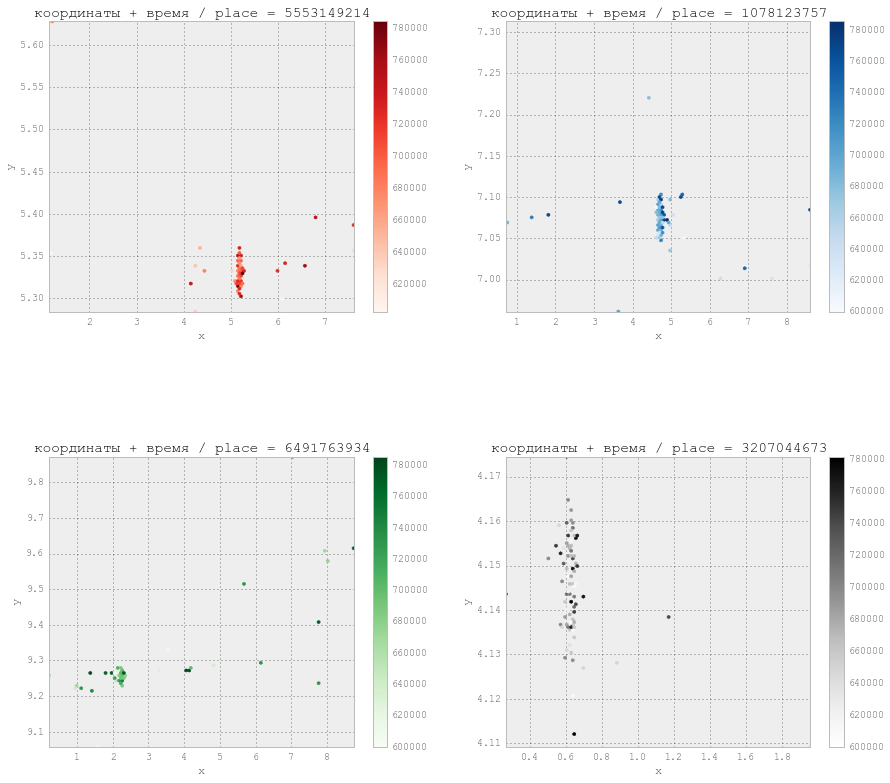

In [66]:
figsize(15, 13)
plt.figure(1)
ax = plt.subplot(221)
test[test.place_id==5553149214].plot(kind='hexbin', ax=ax, x='x', y='y', C='time', cmap=plt.cm.Reds) # , colormap='RdYlGn'
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("координаты + время / place = 5553149214")

ax = plt.subplot(222)
test[test.place_id==1078123757].plot(kind='hexbin', ax=ax, x='x', y='y', C='time', cmap=plt.cm.Blues) # , colormap='RdYlGn'
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("координаты + время / place = 1078123757")

ax = plt.subplot(223)
test[test.place_id==6491763934].plot(kind='hexbin', ax=ax, x='x', y='y', C='time', cmap=plt.cm.Greens) # , colormap='RdYlGn'
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("координаты + время / place = 6491763934")

ax = plt.subplot(224)
test[test.place_id==3207044673].plot(kind='hexbin', ax=ax, x='x', y='y', C='time', cmap=plt.cm.Greys) # , colormap='RdYlGn'
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("координаты + время / place = 3207044673")

зп время возмодны разные размазывания (по x и по y)
но на самом деле x и y в разных шкалах!!!

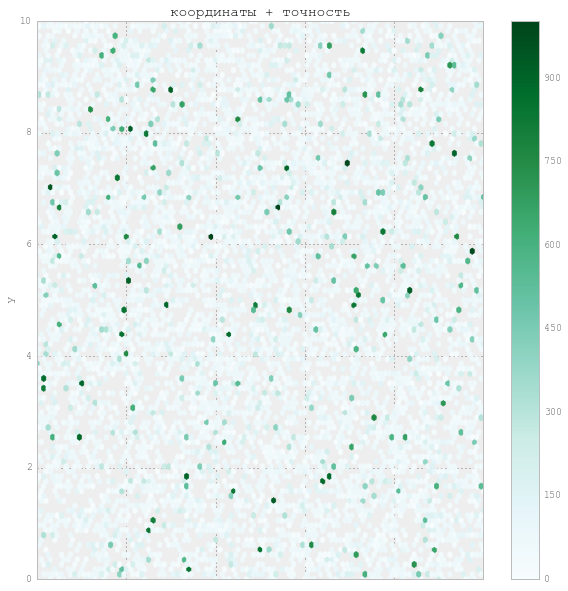

In [48]:
figsize(10, 10)
ax = test[:10000].plot(kind='hexbin', x='x', y='y', C='accuracy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("координаты + точность")

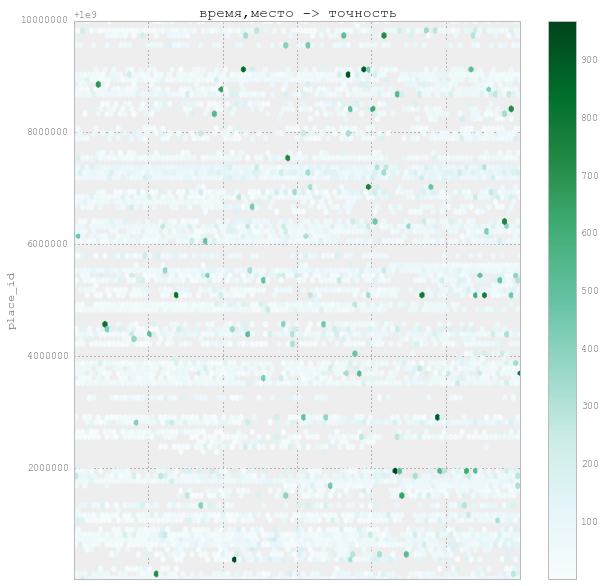

In [58]:
figsize(10, 10)
ax = train[train.place_id<=1010015801].plot(kind='hexbin', x='time', y='place_id', C='accuracy')
ax.set_xlabel("time")
ax.set_ylabel("place_id")
ax.set_title("время,место -> точность")

In [56]:
train.place_id.min()

1000015801

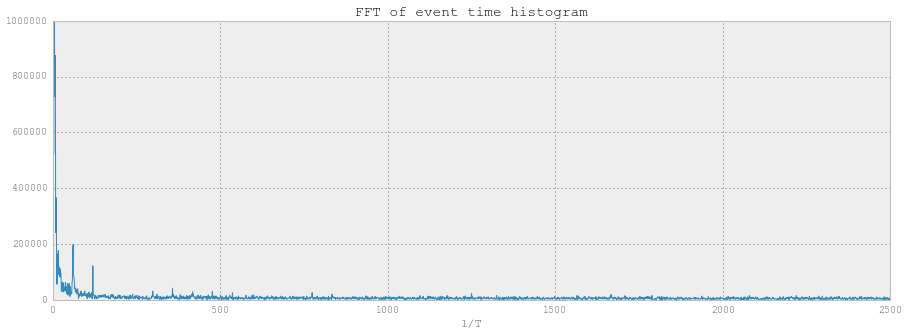

In [70]:
figsize(15,5)
# Compute the histogram of the event time
t = train['time']
h = np.histogram(t, 5000)

# To know the unit definition of Time
# we can look into the frequency structure of the histogram
hist_fft = np.absolute(np.fft.fft(h[0]))
plt.plot(hist_fft)
plt.xlim([0,2500])
plt.ylim([0,1e6])
plt.title('FFT of event time histogram')
plt.xlabel('1/T')
plt.grid(True)
plt.show()

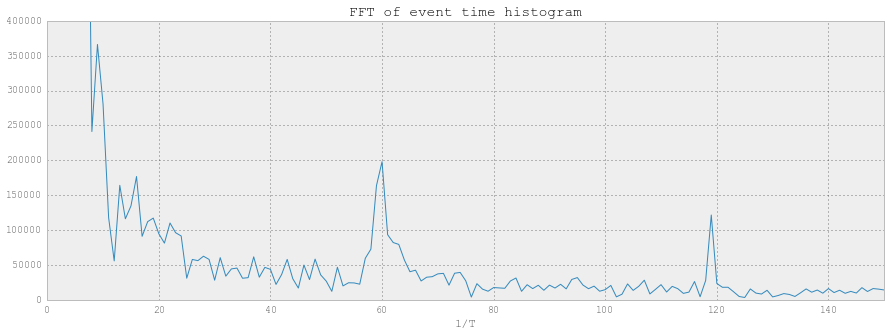

In [78]:
# To know the unit definition of Time
# we can look into the frequency structure of the histogram
hist_fft = np.absolute(np.fft.fft(h[0]))
plt.plot(hist_fft)
plt.xlim([0,150])
plt.ylim([0,4e5])
plt.title('FFT of event time histogram')
plt.xlabel('1/T')
plt.grid(True)
plt.show()

In [76]:
# что делает гистограмма
print(np.histogram([0,1,2,1,2,2]))
print(np.histogram([0,1,2,1,2,2], 3))

(array([1, 0, 0, 0, 0, 2, 0, 0, 0, 3], dtype=int64), array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]))
(array([1, 2, 3], dtype=int64), array([ 0.        ,  0.66666667,  1.33333333,  2.        ]))


In [84]:
t = train['time']
t[:5]

15280869    1
23020268    1
3977976     1
27743788    2
3836334     3
Name: time, dtype: int64

In [87]:
t.max()

599999

In [88]:
h = np.histogram(t, 599998)

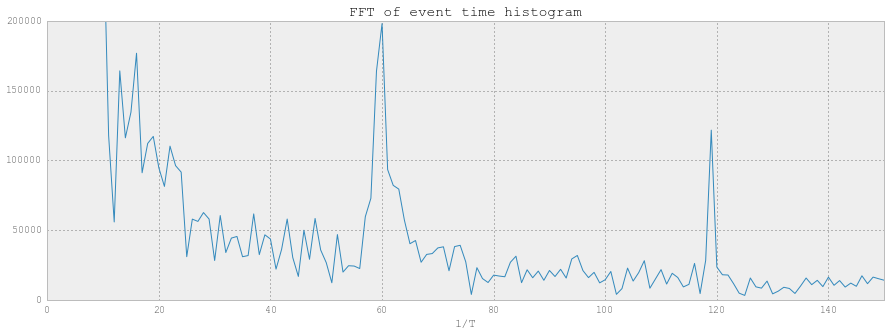

In [92]:
# To know the unit definition of Time
# we can look into the frequency structure of the histogram
hist_fft = np.absolute(np.fft.fft(h[0]))
plt.plot(hist_fft)
plt.xlim([0,150])
plt.ylim([0,2e5])
plt.title('FFT of event time histogram')
plt.xlabel('1/T')
plt.grid(True)
plt.show()

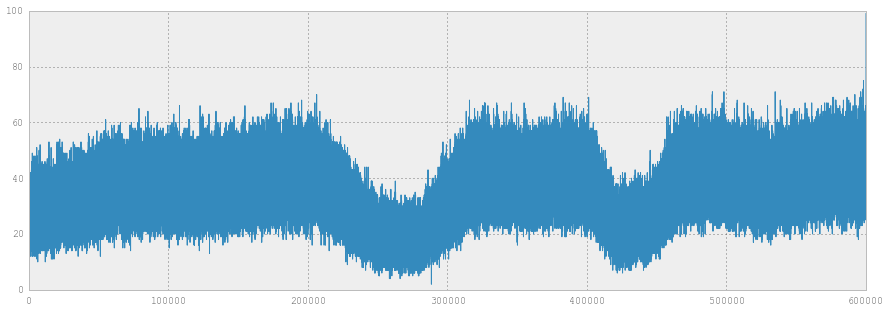

In [94]:
plt.plot(h[0])

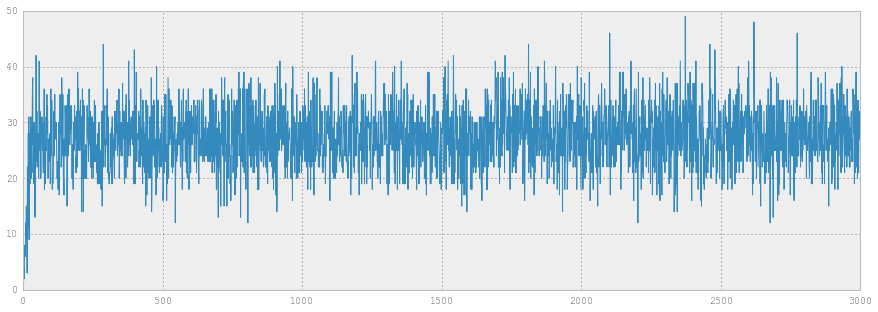

In [100]:
plt.plot(h[0][:3000])

In [104]:
60*24*7 # 60*

10080

In [108]:
h = np.histogram(t, int(t.max()/60))

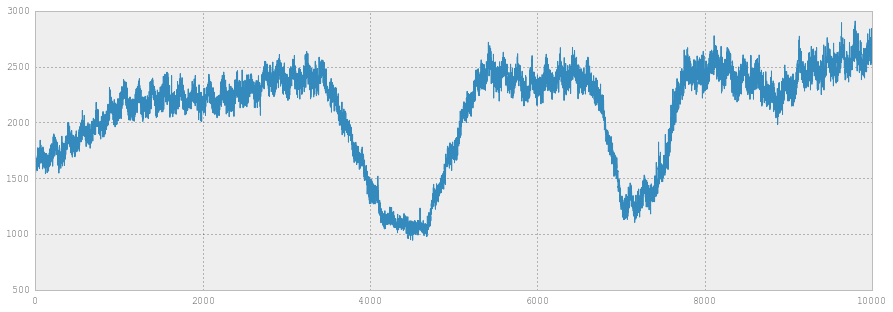

In [109]:
plt.plot(h[0])

# Анимация

In [247]:
from matplotlib import animation

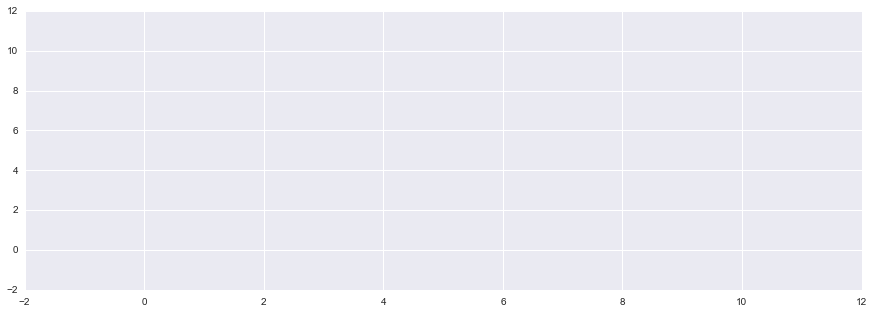

In [248]:
n = 10 #number of places to plot
decay = 20 #If not False older check ins will disappear from the plot

plots=[] #Animated objects to update

c=[cm.jet(x) for x in np.linspace(0.0, 1.0, n)] #let's borrow colors from everyone's dear Jet

places = trainX.place_id.unique()

timemin=99999999999
timemax=0

data=[] #Temporary data storage

fig = plt.figure()
ax=fig.add_subplot(111)

for i  in range(n):
    place=train[trainX.place_id==places[i]]
    data.append(place)
    
    timemin=min(timemin,place.time.min())
    timemax=max(timemax,place.time.max())

    ax.set_xlim([-2.0,12.0])
    ax.set_ylim([-2.0,12.0])
    
    plots.append(plt.scatter(x=[],y=[],c=c[i], alpha=0.1))
plots.append(ax.text(0.1,0.9,'',transform=ax.transAxes))
timeinc=(timemax-timemin)/600.0# 30fps 20 seconds

In [249]:
def redraw(frame):
    current_time=timemin+timeinc*frame
    for i in range(n):
        if decay:
            place=data[i][(data[i].time<=current_time)&(data[i].time>=current_time-decay*timeinc)]
        else:
            place=data[i][data[i].time<=current_time]
        #print len(place)
        
        plots[i].set_offsets(np.hstack((place.x.values[:,np.newaxis],place.y.values[:,np.newaxis])))
        plots[i]._sizes = place.accuracy.values
    txt='Day:{} Weekday:{} Hour:{}'.format(int(current_time/1440), int(current_time/1440)%7, int(current_time/60)%24)
    plots[-1].set_text(txt)
    return tuple(plots)

In [250]:
def init():    
    return tuple(plots)

anim = animation.FuncAnimation(fig, redraw, init_func=init, blit=True,
                               frames=600, interval=1, repeat=True)

In [251]:
#anim.save('D:\\Competitions\\Facebook\\PopularCheckins.gif')# , writer='imagemagick', , fps=30

# для Винды ffmpeg надо сначала установить

plt.rcParams['animation.ffmpeg_path'] = 'c:\\ProgramsPortable\\ffmpeg\\bin\\ffmpeg.exe'
FFwriter = animation.FFMpegWriter()
anim.save('D:\\Competitions\\Facebook\\PopularCheckins.mp4', writer = FFwriter, fps=30)